# Определение факторов, влияющих на успешность игры

Сегодня индустрия компьютерных игр представляет собой быстро развивающийся сектор глобальной экономики, связанный с разработкой, продвижением и продажей игр. А сами игры теперь позиционируются и воспринимаются пользователями как качественное многожанровое интерактивное развлечение, которое постепенно становится все популярнее.

Мне как работнику интернет-магазина "Стримчик" необходимо спланировать рекламные кампании на 2017 год. Для этого необходимо найти закономерности, влияющие на успешность игры, что позволит определить потенциально популярный продукт среди геймеров.

На основе данных за предыдущие периоды рассмотрим, сколько игр выпускалось в разные годы, как менялись продажи по платформам. Определив актуальный период, выясним, какие из платформ являются лидерами по продажам, как отзывы пользователей и критиков влияют на продажи игр. Составим портрет пользователя каждого региона: на каких платформах он предпочитает играть, какие жанры выбирает. Наконец, проверим гипотезы о равенстве средней пользовательской оценке игр на платформах Xbox One и PC, игр в жанре экшен и спорт.

**Цель исследования**: выявить закономерности, определяющие успешность компьютерной игры.

**Ход исследования**

Данные для исследования получим из файла `games.csv`. О качестве данных ничего не известно, поэтому перед проверкой гипотез понадобится их проверить. Найдем ошибки данных и оценим их влияние на исследование. На этапе предобработки попробуем исправить критичные из них.
 
Исследование пройдет в пять этапов:
 1. Изучение данных.
 2. Предобработка данных.
 3. Ислледовательский анализ.
 4. Составление портрета пользователя. 
 5. Проверка гипотез.

## Изучение данных из файла

Составим первое впечатление о входных данных. Для начала импортируем необходимые в работе библиотеки.

In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings

Прочитаем файл `games.csv` из каталога `datasets` и сохраним его в переменной `games`.

In [130]:
games = pd.read_csv('/datasets/games.csv')

Составим представление о данных, отобразив на экране первые десять строк таблицы.

In [131]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Изучим состав таблицы с помощью метода `info()`.

In [132]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Итак, в таблице 11 столбцов:
* `Name` — название игры;
* `Platform` — платформа;  
* `Year_of_Release` — год выпуска;
* `Genre` — жанр игры;
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий);
* `EU_sales` — продажи в Европе (миллионы проданных копий);  
* `JP_sales` — продажи в Японии (миллионы проданных копий);
* `Other_sales` — продажи в других странах (миллионы проданных копий);
* `Critic_Score` — оценка критиков (максимум 100);
* `User_Score` — оценка пользователей (максимум 10);
* `Rating` — рейтинг от организации ESRB.

### Выводы

В каждой строке таблицы — данные о компьютерной игре. Часть колонок описывает саму игру: наименование, жанр, год выпуска, платформа. Другая часть — информацию о проданных копиях в разных регионах. Последний блок содержит сведения о рейтингах игры. 

Предварительно можно утверждать, что, данных достаточно для проверки гипотез. Но встречаются пропуски в данных, а в названиях колонок — расхождения с хорошим стилем.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных

Приведем наименования столбцов таблицы к хорошему стилю: запишем их в нижнем регистре с помощью метода `lower()`.

In [133]:
games.columns = games.columns.str.lower()

Посчитаем количество пропущенных значений в столбцах.

In [134]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Удалим из таблицы строки с пропущенным наименованием, жанром и годом выпуска игры, т.к. они составляют менее двух процентов выборки данных, а также отсутствуют подходящие варианты для их заполнения.

In [135]:
games = games.dropna(subset=['name', 'genre', 'year_of_release'])

В таблице встречается нечисловые значения `tbd` столбца `user_score`. Такая аббревиатура используется в случаях, когда какая-то информация еще не определена. Для единообразия заменим такие значения на `NaN`.

In [136]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = float('nan')

Пропуски в столбцах `critic_score`, `user_score` говорят об отсутствии рейтинга у игры, вероятно из-за малого количества оценок, необходимого для его формирования. Заполним их значением -1: оценки с такими значениями будем исключать из анализа.

In [137]:
games[['critic_score', 'user_score']] = games[['critic_score', 'user_score']].fillna(-1)

Рейтинг ESRB используется в Америке и Канаде для возрастной маркировки компьютерных игр. Для записей в таблице с отсутствующим значением в столбце `rating` пропишем N/A, чтобы включить их в анализ данных.

In [138]:
games['rating'] = games['rating'].fillna('N/A')

Приведем столбец `year_of_release` к типу `int`, т.к. год является целочисленным числом, a столбцец `user_score` к типу `float`.

In [139]:
games['year_of_release'] = games['year_of_release'].astype(int)
games['user_score'] = pd.to_numeric(games['user_score'])

Найдем суммарное количество проданных копий игры, сложив значения в столбцах `na_sales`, `eu_sales`, `jp_sales` и `other_sales`. Полученное значение сохраним в столбце `all_sales`.

In [140]:
games['all_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

### Выводы

Предобработка обнаружила три проблемы данных:
* нарушения стиля в заголовках
* пропущенные значения
* некорректный тип данных

Приведя наименования столбцов к хорошему стилю, избавившись от пропусков и изменив тип данных столбцов таблицы, перейдем к расчетам и проверке гипотез.

In [141]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = games.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-------------------------')
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  all_sales        16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

## Исследовательский анализ данных

Изучим распределение игр по годам выпуска, построив гистограмму по столбцу `year_of_release` с помощью функции `distplot()` библиотеки `seaborn`. 

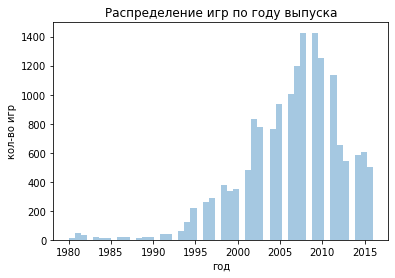

In [142]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    ax = sns.distplot(games['year_of_release'], kde=False)
    ax.set_title('Распределение игр по году выпуска')
    ax.set_xlabel('год')
    ax.set_ylabel('кол-во игр')

По графику видно, что самым плодотворным для создателей игр был период с 2008 по 2009 год. С 2012 и до 2106 года новые игры выпускались не очень активно.

Изучим распределение продаж игр по годам в разрезе платформ. Сначала найдем топ 10 платформ с максимальным количеством проданных копий игр и сохраним их в списке `top_platforms`.

In [143]:
top_platforms = []

for platform in games['platform'].unique():
    if platform in (games.pivot_table(values='all_sales', index=('platform'), aggfunc='sum')
                    .sort_values(by='all_sales', ascending=False).head(10).index):
        top_platforms.append(platform)

Для каждой отобранной платформы построем график распределения количества проданных игр по годам.

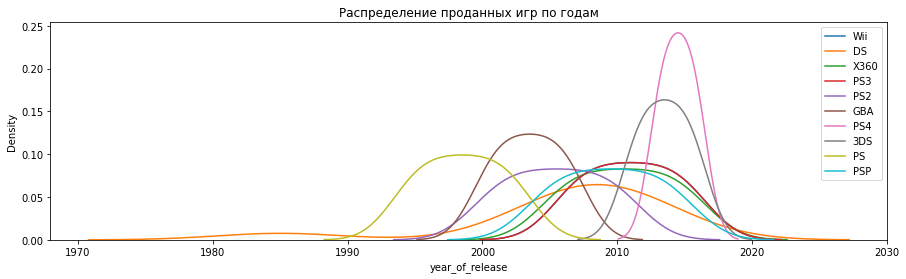

In [144]:
fig, ax = plt.subplots()
for platform in top_platforms:
    values = games.loc[games['platform'] == platform].pivot_table(values='all_sales', index='year_of_release', aggfunc='sum')
    ax = sns.kdeplot(values.index, label=platform)
    ax.legend()
    ax.set_title('Распределение проданных игр по годам')
    fig.set_figwidth(15)

По графику можно судить о популярности той или иной платформы в разные периоды времени. Так в конце 90-х была популярна платформа PS, в 21 веке ее сменила PS2 и GBA. Позднее стали популярны игры на DS, PSP, Wii, PS3, X360. После 2010 года лидерами продаж стали платформы PS4 и 3DS.

Из диаграммы можно сделать вывод, что жизненный цикл платформы составляет около 5 лет, поэтому для прогнозирования продаж на 2017 год будем использовать данные с 2012 по 2016 год. Вынесем их в таблицу `games_actual`.

In [145]:
games_actual = games.loc[games['year_of_release'] >= 2012]

Определим 5 лидирующих платформ по количеству проданных копий в период с 2012 по 2016 год и сохраним их в списке `actual_top_platforms`.

In [146]:
actual_top_platforms = []

for platform in games_actual['platform'].unique():
    if platform in (games_actual.pivot_table(values='all_sales', index=('platform'), aggfunc='sum')
                    .sort_values(by='all_sales', ascending=False).head().index):
        actual_top_platforms.append(platform)

Визуализируем количество проданных игр, построив графики для каждой платформы.

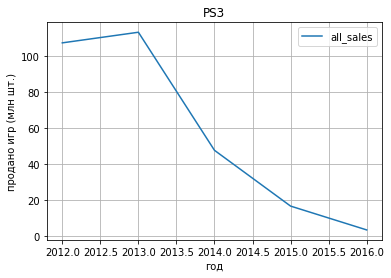

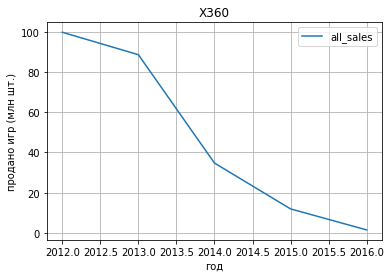

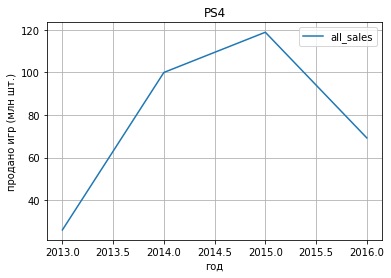

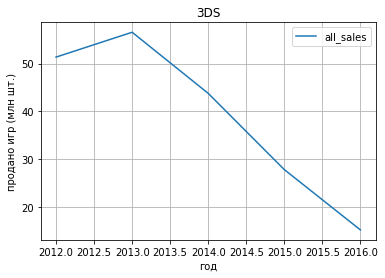

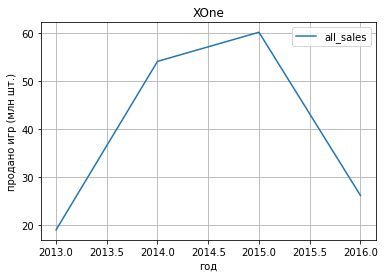

In [147]:
for platform in actual_top_platforms:
    games_actual.loc[games_actual['platform'] == platform].pivot_table(values='all_sales', index='year_of_release', aggfunc='sum').plot(grid=True)
    plt.title(platform)
    plt.xlabel('год')
    plt.ylabel('продано игр (млн шт.)')

Количество продаж у платформ PS3, X360 и 3DS уменьшается после 2013 года. В то же время растет популярность игр для PS4 и Xone.

Построим диаграмму размаха для каждой платформы и изучим, как распределены продажи между ними.

(0.0, 2.0)

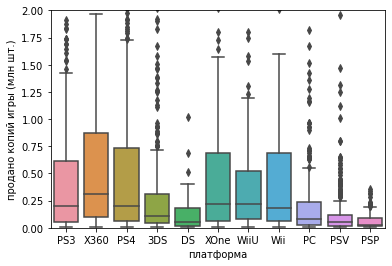

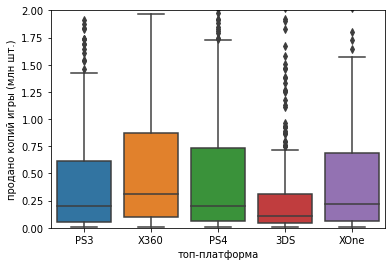

In [148]:
actual_sales = pd.DataFrame()
for platform in games_actual['platform'].unique():
    values = pd.DataFrame({'платформа':platform, 'продано копий игры (млн шт.)': games_actual.loc[games_actual['platform'] == platform, 'all_sales']})
    actual_sales = actual_sales.append(values)
    
fig, ax = plt.subplots()
ax = sns.boxplot(x='платформа', y='продано копий игры (млн шт.)', data=actual_sales)
ax.set_ylim(0,2)

actual_top_platforms_sales = pd.DataFrame()
for platform in actual_top_platforms:
    values = pd.DataFrame({'топ-платформа':platform, 'продано копий игры (млн шт.)': games_actual.loc[games_actual['platform'] == platform, 'all_sales']})
    actual_top_platforms_sales = actual_top_platforms_sales.append(values)
    
fig, ax = plt.subplots()
ax = sns.boxplot(x='топ-платформа', y='продано копий игры (млн шт.)', data=actual_top_platforms_sales)
ax.set_ylim(0,2)

По диаграмме размаха можно сделать вывод, что копии игр, выпущенных для платформы Xbox 360 в период с 2012 по 2016 продаются успешнее игр конкурирующих платформ: при медианном значении около 300 тысяч копий. Аутсайдером по числу продаж является PSP и PSV. Среди топ-платформ это Nintendo 3DS с медианным значением продаж 100 тысяч копий, продажи свыше 750 тысяч копий являются исключением из правил для этой консоли.

Проанализируем на диаграммах рассеивания, как оценки критиков влияют на продажи игры.

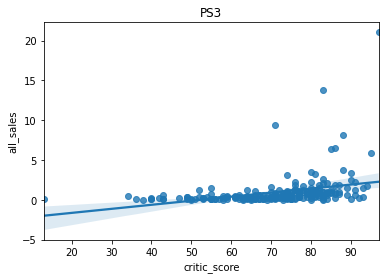

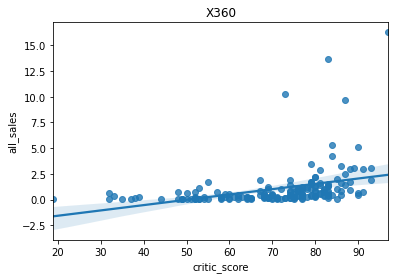

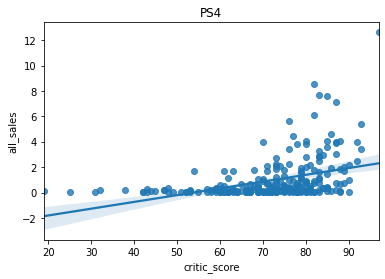

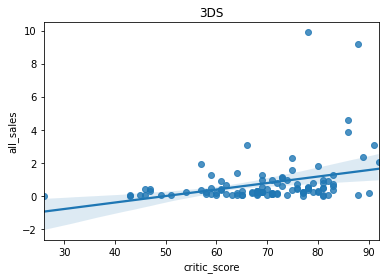

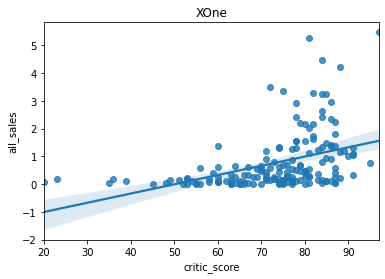

In [149]:
fig, ax = plt.subplots()
for platform in actual_top_platforms:
    ax = (sns.regplot(x=games_actual.loc[(games_actual['platform'] == platform) & (games_actual['critic_score'] > 0), 'critic_score'], 
                      y=games_actual.loc[(games_actual['platform'] == platform) & (games_actual['critic_score'] > 0), 'all_sales']))
    ax.set_title(platform)
    plt.show()

На графиках распределения прослеживается небольшая зависимость между рейтингами критиков и продажами игр: чем рейтинг игры выше, тем больше копий продается. 

Проверим, наблюдается ли зависимость между продажами и пользовательским рейтингом.

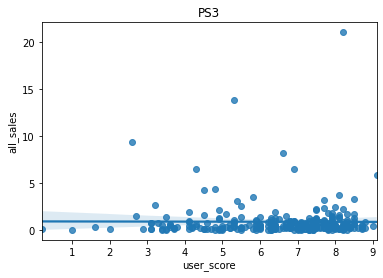

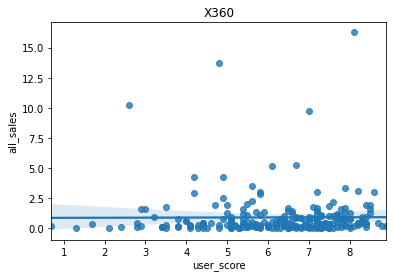

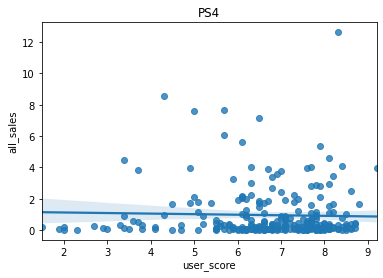

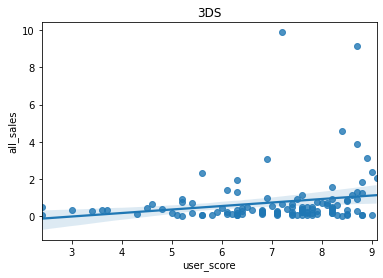

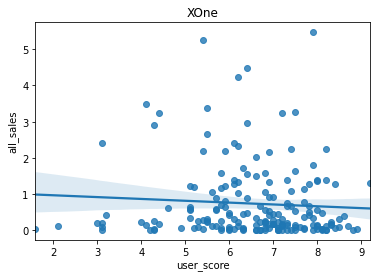

In [150]:
fig, ax = plt.subplots()
for platform in actual_top_platforms:
    ax = (sns.regplot(x=games_actual.loc[(games_actual['platform'] == platform) & (games_actual['user_score'] > 0), 'user_score'], 
                      y=games_actual.loc[(games_actual['platform'] == platform) & (games_actual['user_score'] > 0), 'all_sales']))
    ax.set_title(platform)
    plt.show()

В случае с пользовательским рейтингом картина обстоит иначе: игры с низким и высоким рейтингом продаются примерно одинаково.

Подтвердим наши выводы, рассчитав коэффициент корреляции между количеством продаж и рейтингами для каждой платформы.

In [151]:
for platform in actual_top_platforms:
    print(f'{platform}\nКоэффициент корреляции между продажами и рейтингом критиков для платформы: {games_actual.loc[(games_actual["platform"] == platform) & (games_actual["critic_score"] > 0), "all_sales"].corr(games_actual.loc[(games_actual["platform"] == platform) & (games_actual["critic_score"] > 0), "critic_score"])}')
    print(f'Коэффициент корреляции между продажами и рейтингом пользователей для платформы: {games_actual.loc[(games_actual["platform"] == platform) & (games_actual["user_score"] > 0), "all_sales"].corr(games_actual.loc[(games_actual["platform"] == platform) & (games_actual["user_score"] > 0), "user_score"])}\n')

PS3
Коэффициент корреляции между продажами и рейтингом критиков для платформы: 0.3314972592629587
Коэффициент корреляции между продажами и рейтингом пользователей для платформы: -0.005143522887113816

X360
Коэффициент корреляции между продажами и рейтингом критиков для платформы: 0.36057348885073365
Коэффициент корреляции между продажами и рейтингом пользователей для платформы: 0.0061639786462133256

PS4
Коэффициент корреляции между продажами и рейтингом критиков для платформы: 0.406567902061781
Коэффициент корреляции между продажами и рейтингом пользователей для платформы: -0.031957110204556424

3DS
Коэффициент корреляции между продажами и рейтингом критиков для платформы: 0.32080286953607845
Коэффициент корреляции между продажами и рейтингом пользователей для платформы: 0.19758263411038596

XOne
Коэффициент корреляции между продажами и рейтингом критиков для платформы: 0.41699832800840175
Коэффициент корреляции между продажами и рейтингом пользователей для платформы: -0.0689250532827

Выводы, полученный с диаграмм подтверждены: существуют слабая зависимость между рейтингом критиков и продажами игры, зависимости между пользовательским рейтингом и продажами не наблюдается.

Рассмотрим распределение игр по жанрам с помощью диаграммы размаха и найдем самые прибыльные из них.

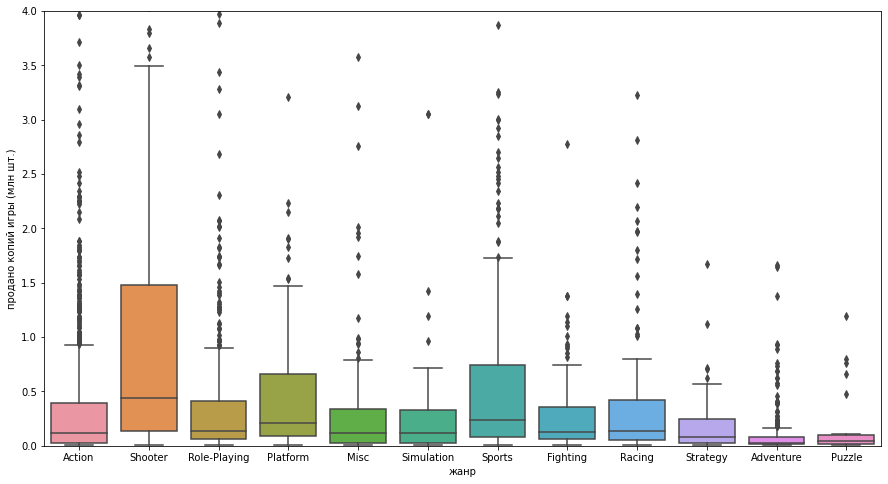

In [152]:
actual_genres = pd.DataFrame()
for genre in games_actual['genre'].unique():
    values = pd.DataFrame({'жанр':genre, 'продано копий игры (млн шт.)': games_actual.loc[games_actual['genre'] == genre, 'all_sales']})
    actual_genres = actual_genres.append(values)
    
fig, ax = plt.subplots()
ax = sns.boxplot(x='жанр', y='продано копий игры (млн шт.)', data=actual_genres)
ax.set_ylim(0,4)
fig.set_figwidth(15)
fig.set_figheight(8)

На диаграмме видно, что лучшие медианные продажи показывают игры в жанре шутер: около полумиллиона проданных копий. Не редко продажи игр в этом жанре доходят до отметки в полтора миллиона. Также стоит выделить спортивные игры и платформеры: игры таких жанров показывают неплохие результаты продаж. В качестве аутсайдеров выступают приключения и пазлы: таким играм редко удается привлечь внимание геймеров. Отдельно отметим ролевые игры и игры в жанре экшен: несмотря на низкий медианный показатель продаж, отдельные игры смогли достигнуть отметки в 4 млн проданных копий. 

### Выводы

Изучив, как выпускались и продавались игры для каждой платформы в разные годы, смогли определить длительность жизненного цикла платформы: 5 лет. Таким образом в качестве актуального периода был выбран промежуток с 2012 по 2016 год. 

Среди пяти потенциально прибыльных платформ установили, что лучше всего на рынке продаются игры для платформы Xbox360, в то время как игры, выпущенные для консоли Nintendo 3DS редко преодолевают отметку в 750 тысяч проданных копий.

На основании графиков распределения и рассчитанного коэффициента корреляции, установили, что существует слабая зависимость между продажами игры и рейтингом критиков: чем рейтинг выше, тем игра лучше продается. Пользовательская оценка, однако, на успешность продаж не влияет.

Наконец, определили самые успешные жанры по количеству проданных копий: shooter, sports и platform. Игры в жанре adventure и puzzle наименее интересны геймерам.

## Портрет пользователя

Определим для пользователей каждого региона топ популярных платформ. Сначала сгруппируем данные таблицы по платформам и рассчитаем количество продаж для каждого региона в период с 2012 по 2016 год.

In [153]:
games_actual_by_platform = games_actual.pivot_table(index='platform', values=('na_sales', 'eu_sales', 'jp_sales'), aggfunc='sum')

Визуализируем полученные результаты с помощью круговых диаграмм.

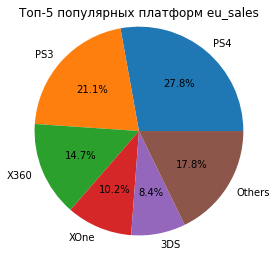

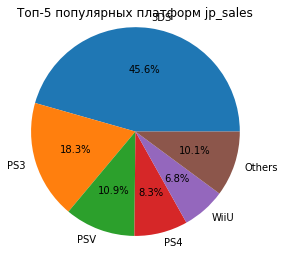

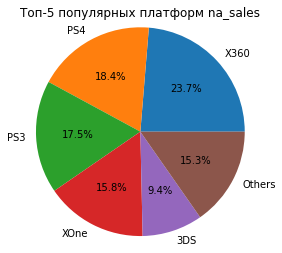

In [200]:
for region in games_actual_by_platform.columns:
    fig, ax = plt.subplots()
    values = games_actual_by_platform[region].sort_values(ascending=False).head().tolist()
    values.append(games_actual_by_platform[region].sort_values(ascending=False)[5:].sum())
    labels = games_actual_by_platform.sort_values(by=region, ascending=False).head().index.tolist()
    labels.append('Others')
    ax.pie(values, labels=labels, autopct='%1.1f%%', radius=1.2)
    ax.set_title(f'Топ-5 популярных платформ {region}')

Среди европейцев более половины всех продаж принадлежит платформам компании Sony: PS3 и PS4, что говорит о высокой популярности компании в игровой индустрии Европы.

Более половины всех продаж Японии приходится на консоль 3DS от Nintendo. Вероятно, в стране восходящего солнца больше ценится мобильность, чем качество картинки. Об этом также говорит попадание в топ продаж портативной консоли PlayStation Vita (PSV).

В Северной Америке лидером продаж в период с 2012 по 2016 год стала платформа Xbox 360 от Microsoft. За ней расположились PS4, PS3 и XOne с долями продаж около 20%. Таким образом, можно сделать вывод, что главными конкурентами на рынке компьютерных игр Северной Америки являются компании Sony и Microsoft.

Изучим популярность игровых жанров среди игроков Европы, Японии и Северной Америки, рассчитав совокупные продажи для каждого жанра в разрезе регионов.

In [155]:
games_actual_by_genre = games_actual.pivot_table(index='genre', values=('na_sales', 'eu_sales', 'jp_sales'), aggfunc='sum')

Визуализируем данные, применив функции модуля `pyplot` библиотеки `matplotlib`.

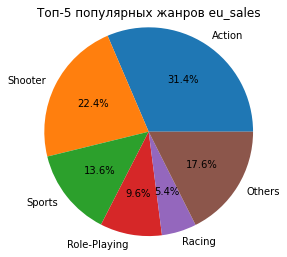

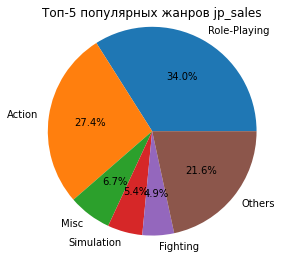

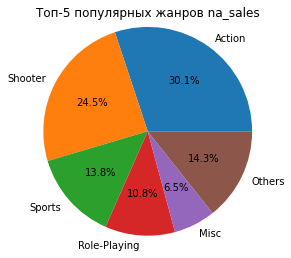

In [199]:
for region in games_actual_by_genre.columns:
    fig, ax = plt.subplots()
    values = games_actual_by_genre[region].sort_values(ascending=False).head().tolist()
    values.append(games_actual_by_genre[region].sort_values(ascending=False)[5:].sum())
    labels = games_actual_by_genre.sort_values(by=region, ascending=False).head().index.tolist()
    labels.append('Others')
    ax.pie(values, labels=labels, autopct='%1.1f%%', radius=1.2)
    ax.set_title(f'Топ-5 популярных жанров {region}')

По диаграммам видно, что вкусы игроков Европы и Северной Америки практически совпадают: наиболее популярными являются игры в жанрах экшен и шутер. В европейский топ также попали гонки, в то время как американцы гонкам предпочитают игры в жанре miscellaneous .

В Японии любимым жанром являются ролевые и экшен-игры. Шутеры, популярные в других регионах, в Японии не пользуются спросом, зато файтинги и симуляторы нашли своих почитателей и попали в топ.

Проверим, влияет ли рейтинг ESRB на продажи в отдельных регионах. Сгруппируем данные по колонке `rating` и найдем суммарные продажи для каждого региона.

In [157]:
games_actual_by_rating = games_actual.pivot_table(index='rating', values=('na_sales', 'eu_sales', 'jp_sales'), aggfunc='sum')

Построим диаграммы распределения продаж в зависимости от присвоенного рейтинга ESRB для каждого региона.

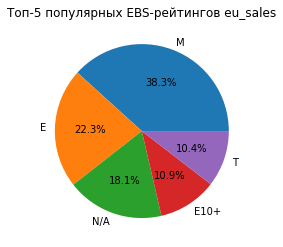

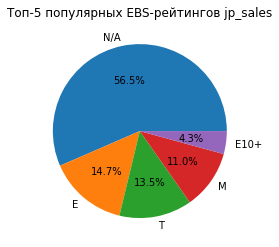

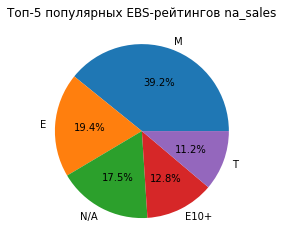

In [158]:
for region in games_actual_by_rating.columns:
    values = games_actual_by_rating[region].sort_values(ascending=False).head()
    labels = games_actual_by_rating.sort_values(by=region, ascending=False).head().index
    fig, ax = plt.subplots()
    ax.pie(values, labels=labels, autopct='%1.1f%%')
    ax.set_title(f'Топ-5 популярных EBS-рейтингов {region}')

In [159]:
temp = games_actual.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


N/A     1275
M        498
T        412
E        395
E10+     306
Name: rating, dtype: int64

Европейские и американские игроки отдают предпочтения играм с рейтингом M (18+), наименее популярными являются игры для подростков (T). Такое различие связано с преобладанием в Европе и Северной Америке продаж игр в жанре шутер, которые требуют маркировку M. В Японии ситуация значительно отличается: больше половины проданных игр не имеют оценку EBSR, поэтому говорить о влиянии данного рейтинга на продажи компьютерных игр не приходится. 

### Выводы

Изучив данные в разных проекциях, мы смогли составить портрет типичного геймера в каждом регионе:
* европеец предпочитает игры в жанре Action и Shooter на платформах Sony;
* японец выбирает ролевые и экшен-игры для портативной консоли Nintendo 3DS;
* американец любит играть в экшены и шутеры как на платформах от Sony, так и от компании Microsoft.

## Проверка гипотез

Сформулируем нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Тогда альтернативная гипотеза будет звучать так: средние пользовательские рейтинги платформ Xbox One и PC различаются. Для проверки гипотезы сравним средние рейтинги генеральных совокупностей платформ с помощью метода `ttest_ind`, т.к. выборки разного размера, а так же есть сомнения, что дисперсии у совокупностей одинаковые, укажем значение параметра `equal_var` = false. Значение уровня статистической значимости зададим равной 5%. 

In [162]:
xone_user_score = games_actual.loc[(games_actual['platform'] == 'XOne') & (games_actual['user_score'] > 0), 'user_score']
pc_user_score = games_actual.loc[(games_actual['platform'] == 'PC') & (games_actual['user_score'] > 0), 'user_score']

alpha = 0.05

results = st.ttest_ind(xone_user_score, pc_user_score, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что вероятность получить такое различие случайно почти 55%. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними пользовательскими рейтингами платформ Xbox One и PC.

Подкрепим наши выводы, рассчитав значения средних рейтингов пользователей для этих жанров.

In [165]:
print(f'Средний пользовательский рейтинг платформы Xbox One: {games_actual.loc[(games_actual["platform"] == "XOne") & (games_actual["user_score"] > 0), "user_score"].mean()}')
print(f'Средний пользовательский рейтинг платформы PC: {games_actual.loc[(games_actual["platform"] == "PC") & (games_actual["user_score"] > 0), "user_score"].mean()}')

Средний пользовательский рейтинг платформы Xbox One: 6.521428571428572
Средний пользовательский рейтинг платформы PC: 6.4286407766990274


Как видим, пользовательские рейтинги этих платформ довольно близки.

Перейдем к проверке второй гипотезы. Она звучит следующим образом: cредние пользовательские рейтинги жанров Action и Sports одинаковые. Соответствующая ей альтернативная гипотеза будет такой: cредние пользовательские рейтинги жанров Action и Sports различны. Для проверки гипотезы воспользуемся методом `ttest_ind`. Уровень значимости определим 5%.

In [167]:
action_user_score = games_actual.loc[(games_actual['genre'] == 'Action') & (games_actual['user_score'] > 0), 'user_score']
sports_user_score = games_actual.loc[(games_actual['genre'] == 'Sports') & (games_actual['user_score'] > 0), 'user_score']

alpha = 0.05

results = st.ttest_ind(action_user_score, sports_user_score, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


Полученное значение p-value меньше заданного уровня критической значимости, следовательно, гипотезу о равенстве средних пользовательских оценок игр в жанре экшен и спорт следует отвергнуть.

Дополнительно найдем средние пользовательские рейтинги для этих жанров функцией `mean()`.

In [166]:
print(f'Средний пользовательский рейтинг жанра Action: {games_actual.loc[(games_actual["genre"] == "Action") & (games_actual["user_score"] > 0), "user_score"].mean()}')
print(f'Средний пользовательский рейтинг жанра Sports: {games_actual.loc[(games_actual["genre"] == "Sports") & (games_actual["user_score"] > 0), "user_score"].mean()}')

Средний пользовательский рейтинг жанра Action: 6.825047801147227
Средний пользовательский рейтинг жанра Sports: 5.455897435897437


Действительно, средние оценки пользователей для этих жанров Action и Sports различны.

### Выводы

С помощью t-теста мы проверили две гипотезы. Первую гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC отвергать не стали, т.к. вероятность получить такое различие случайно более 50%. Вторую гипотезу об одинаковых средних пользовательских оценках игр в жанре Action и Sport мы отвергли из-за низкого значения p-value по отношению к критерию значимости в 5%.

## Общий вывод

В ходе исследования были изучены данные об играх, выпущенных до 2016 года. В качестве акутального периода для прогнозирования продаж на 2017 год был выбран участок данных с 2012 по 2016 год. Были изучены взаимосвязи между различными показателями таблицы. Так, ключевыми факторами, влияющими на успешность компьютерной игры, можно назвать платформу, жанр и рейтинг критиков. Лучшие медианные показатели по продажам показывают игры в жанре shooter. Для пользователей разных регионов, преобладающие среди геймеров жанры и платформы компьютерных игр могут отличаться. Европейские и северо-американские геймеры предпочитают играть в экшены и шутеры на платформах от Sony и Microsoft. Японцы выбирают ролевые игры и игры в жанре экшен на портативных консолях, таких как Nintendo 3DS. 

Таким образом, планируя бюджет на 2017 год, особое внимание следует обращать на игры в жанре шутер, выпускаемые на платформе PLayStation 4, отмеченные высокой оценкой критиков. Рекламу следует направить на европейский и американский рынки.